# 0660836 - Dhananjaya

# Requirements

1. Implement simple neural network with two hidden layers
2. No usage of frameworks (e.g. Tensorflow, PyTorch, Keras etc..)
   - usage of numpy and other standard python libraries are allowed
3. Plot the figure and compare the predicted results and ground truths

![](img/our_network.png)
<h4><center> Fig: Network to implement </center></h1>  

# Implementation Details
![Forward pass](img/forward_pass.png)
<h4><center> Fig: Forward Pass </center></h1> 

## Implementation Parameters
1. $x_1$, $x_2$ : neural network inputs
2. $X$: [$x_1$,$x_2$]
3. $y$: neural network output
4. $\hat{y}$: ground truth
5. $L({\theta}$): loss function(MSE $=$ $E(|\hat{y} - y|^2)$
6. $W_1$, $W_2$, $W_3$: weight matrix of network layers


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset (Linear, XOR)
Output: Binary classification (0 or 1)

In [2]:
def generate_linear(n=100):
    import numpy as np
    pts = np.random.uniform(0, 1, (n,2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
            
    return np.array(inputs), np.array(labels).reshape(n,1)

def generate_XOR_easy():
    import numpy as np
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        
        inputs.append([0.1*i, 1 - 0.1*i])
        labels.append(1)
    
    return np.array(inputs), np.array(labels).reshape(21, 1)

In [3]:
def show_result(x, y, pred_y):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize = 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize = 18)
    pred_y = np.round(pred_y)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()

def show_data(x, y, a, b):
    plt.subplot(1,2,1)
    plt.title('Linear Data', fontsize = 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(1,2,2)
    plt.title('XOR Data', fontsize = 18)
    for i in range(a.shape[0]):
        if b[i] == 0:
            plt.plot(a[i][0], a[i][1], 'ro')
        else:
            plt.plot(a[i][0], a[i][1], 'bo')
    plt.show()
            

In [4]:
x1, y1 = generate_linear(n=100)
x2, y2 = generate_XOR_easy()

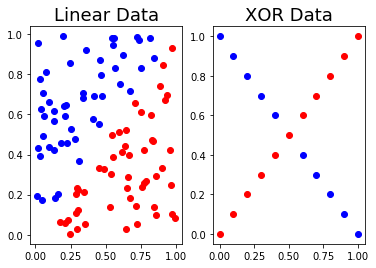

In [5]:
show_data(x1, y1, x2, y2)

# Implementation

Artificial neural networks recreate the structure of human neurons to process information resulting in much  more accurate results than previously used regression models

A neural network is made up of three main parts:
![](img/nn.png)
<h4><center> Fig: A simple 2-hidden layer network </center></h4>


__Input layer__: This is the layer that inputs inforamtion for the neural network to process. Each circle represents single feature.

__Hidden layers__: These are the major processing component of neural network. These nodes receive information from the previous layers, multiply weight and then add bias to it and process through an activation function.

__Output layer__: This layer provide the output of the neural network. It processes all the information from the last hidden layer and gives the output as a confidence score or classification score.

## Mathematical formulation
y = output

x: inputs of the layer

w: weights of the layer

b: bias of the layer
    
$z = w^Tx + b$,

$y = \sigma(z)$


## Backpropagation

The weights are randomly initialized to converge and optimize the neural network better. A better form of intitializing the weights are _Kaiming He_ initialization to converge better

Gradient descent ($\frac{\partial C}{\partial w}$) is used to update the weights

It is calculated using chain rules:
$$\frac{\partial C}{\partial w} = \frac{\partial z}{\partial w}\frac{\partial C}{\partial z}$$

### Forward gradient

$\frac{\partial z}{\partial w}$ as `forward_gradient` during `forward pass`


### Backward gradient

$$\frac{\partial C}{\partial z} = \frac{\partial y}{\partial z}\frac{\partial C}{\partial y}$$

$$y = \sigma(z), \space \frac{\partial y}{\partial z}=\sigma'(z)$$

To obtain $\frac{\partial C}{\partial y}$ consider two cases.

- output layer:

$C$ is come from $L(\theta)$ and $y$ is network output and $\hat{y}$ is groundtruth.

$$ C = L(y, \hat{y}) \\ \frac{\partial C}{\partial y} = L'(y, \hat{y}) $$

We compute derivative loss function and then use it as backward input.

- hidden layer:

In this case, $\frac{\partial C}{\partial y}$ is more diffcult than other.

The output $y$ of current layer is input for next layer.
We assume that $\frac{\partial C}{\partial z_{next}}$ already know.

$$\frac{\partial C}{\partial y_{this}} = \frac{\partial z_{next}}{\partial y_{this}}\frac{\partial C}{\partial z_{next}} $$

$$ \frac{\partial z_{next}}{\partial y_{this}} = w_{next}^T , z_{next} = y_{this}w_{next}$$

Finally, we first compute output layer and then send parameters to previous layer.
Thus we can compute $\frac{\partial C}{\partial z}$ every layer.

### Gradient Descent

After getting $\frac{\partial C}{\partial w}$ from backpropagation, we update the network weights $w$.

Hyperparameter called learning rate $\eta$ decides the rate pf learning.

$$ w = w - \eta \Delta w$$


## Activation function (sigmoid)

Sigmoid function is used as activation function in this neural network

sigmoid of x: $$\sigma(x) = \frac{1}{1+e^{-x}}$$

derivation of sigmoid(x):

$$ \sigma'(x) = \frac{d (1 + e^{-x})^{-1}}{d x} $$

$$ = - (1 + e^{-x})^2 \frac{d}{dx} (1 + e^{-x}) $$

$$ = - (1 + e^{-x})^2 (-e^{-x}) $$

$$ = \sigma(x)(1 - \sigma(x))$$



In [6]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

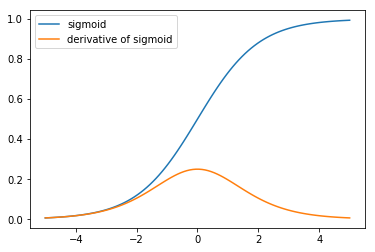

In [7]:
x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label = 'sigmoid')
plt.plot(x, derivative_sigmoid(sigmoid(x)), label = 'derivative of sigmoid')
plt.legend()

## Loss function $L({\theta})$ - Mean Square Error function

Mean Square Error function:
$$ L(y, \hat{y}) =  MSE(y, \hat{y}) = E((y - \hat{y})^2) = \frac{\sum(y - \hat{y})^2}{N}$$

$$ L'(y, \hat{y}) = \frac{\partial E((y - \hat{y})^2)}{\partial y} $$

$$ = \frac{1}{N}(\frac{\partial (y - \hat{y})^2}{\partial y}) $$

$$ = \frac{1}{N}(2(y - \hat{y})\frac{\partial (y - \hat{y})}{\partial y}) $$

$$ = \frac{2}{N}(y - \hat{y})$$

In [8]:
def loss(y, y_hat):
    return np.mean((y - y_hat)**2)

def derivative_loss(y, y_hat):
    return ((y - y_hat)*(2/y.shape[0]))

# Modularized Code 

Class layer contains the initialization of weights using np.random.normal with zero mean and unit variance, forward pass, backward pass and update of weights in a single layer.

The class layer contain
- __init__: *Kaiming He* initialization of weights (zero mean and unit variance)
- __forward__: computes the forward pass
- __backward__: computer the backward pass

![](img/forward_backward.png)
<h4><center> Fig: Forward and Backward pass </center></h4>

- __update__: updates the weights of the layer

In [9]:
class single_layer():
    def __init__(self, in_size, out_size):
        self.weight = np.random.normal(0, 1, (in_size+1, out_size))
        
    def forward(self, x):
        x = np.append(x, np.ones((x.shape[0], 1)), axis = 1)
        self.forward_grad = x
        self.y = sigmoid(np.matmul(x, self.weight))
        return self.y
    
    def backward(self, d_C):
        self.backward_grad = np.multiply(derivative_sigmoid(self.y), d_C)
        return np.matmul(self.backward_grad, self.weight[:-1].T)
    
    def update(self, learning_rate):
        self.grad = np.matmul(self.forward_grad.T, self.backward_grad)
        self.weight -= learning_rate * self.grad
        return self.grad

## modularized neural network structure

It contains:
- forward block: computes the forward pass
- backward block: computes the backward pass
- update block: updates the weights

In [10]:
class neural_net():
    def __init__(self, sizes, learning_rate = 0.1):
        self.learning_rate = learning_rate
        sizes2 = sizes[1:] + [0]
        self.layers = []
        for a,b in zip(sizes, sizes2):
            print('layer size',a, b)

            if b == 0:
                continue
            self.layers += [single_layer(a,b)]
            
    def forward(self, x):
        _x = x
        for layers in self.layers:
            _x = layers.forward(_x)
        return _x
    
    def backward(self, dC):
        _dC = dC
        for layers in self.layers[::-1]:
            _dC = layers.backward(_dC)
            
    def update(self):
        gradients = []
        for layers in self.layers:
            gradients += [layers.update(self.learning_rate)]
        return gradients

# Testing results

In [11]:
nn_linear = neural_net([2,4,4,1], 0.6)
nn_XOR = neural_net([2,4,4,1], 0.6 )
epoch = 100000
loss_threshold = 0.005
linear_stop = False
XOR_stop = False

for i in range(epoch):
    if not linear_stop:
        y = nn_linear.forward(x1)
        loss_linear = loss(y, y1)
        nn_linear.backward(derivative_loss(y, y1))
        nn_linear.update()
        
        if loss_linear < loss_threshold:
            print('Convergence - Linear Network')
            linear_stop = True
    
    if not XOR_stop:
        y = nn_XOR.forward(x2)
        loss_XOR = loss(y, y2)
        nn_XOR.backward(derivative_loss(y, y2))
        nn_XOR.update()
        
        if loss_XOR < loss_threshold:
            print('Convergence - XOR Networ')
            XOR_stop = True

    if i%200 == 0 or (linear_stop and XOR_stop):
        print(
            '[{:4d}] linear loss : {:.4f} \t XOR loss : {:.4f}'.format(
                i, loss_linear, loss_XOR))
        
    if linear_stop and XOR_stop:
        print('Linear network and XOR network converged')
        break
        

layer size 2 4
layer size 4 4
layer size 4 1
layer size 1 0
layer size 2 4
layer size 4 4
layer size 4 1
layer size 1 0
[   0] linear loss : 0.2488 	 XOR loss : 0.2542
[ 200] linear loss : 0.1515 	 XOR loss : 0.2493
[ 400] linear loss : 0.0510 	 XOR loss : 0.2493
[ 600] linear loss : 0.0278 	 XOR loss : 0.2492
[ 800] linear loss : 0.0190 	 XOR loss : 0.2491
[1000] linear loss : 0.0143 	 XOR loss : 0.2490
[1200] linear loss : 0.0113 	 XOR loss : 0.2488
[1400] linear loss : 0.0093 	 XOR loss : 0.2486
[1600] linear loss : 0.0078 	 XOR loss : 0.2483
[1800] linear loss : 0.0066 	 XOR loss : 0.2478
[2000] linear loss : 0.0057 	 XOR loss : 0.2470
[2200] linear loss : 0.0050 	 XOR loss : 0.2457
Convergence - Linear Network
[2400] linear loss : 0.0050 	 XOR loss : 0.2435
[2600] linear loss : 0.0050 	 XOR loss : 0.2394
[2800] linear loss : 0.0050 	 XOR loss : 0.2323
[3000] linear loss : 0.0050 	 XOR loss : 0.2208
[3200] linear loss : 0.0050 	 XOR loss : 0.2042
[3400] linear loss : 0.0050 	 XOR l

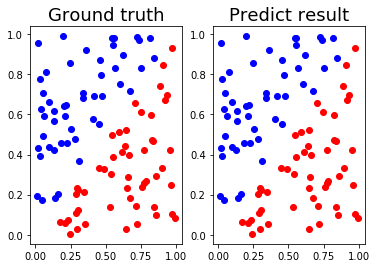

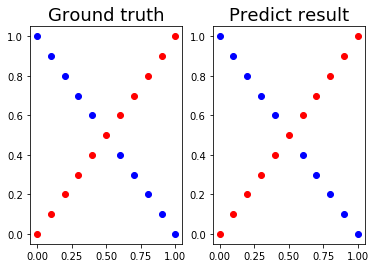

In [12]:
y_linear = nn_linear.forward(x1)
show_result(x1, y1, y_linear)
y_XOR = nn_XOR.forward(x2)
show_result(x2, y2, y_XOR)

In [13]:
count1 = 0
for i in range(y1.shape[0]):
    if np.round(y1[i]) == np.round(y_linear[i]):
        count1 += 1
print('Accuracy of linear network:',count1*100/y1.shape[0])

count2 = 0
for i in range(y2.shape[0]):
    if np.round(y2[i]) == np.round(y_XOR[i]):
        count2 += 1
print('Accuracy of XOR network:',count2*100/y2.shape[0])

print('\n linear test result : \n',y_linear)
print('\n XOR test result : \n',y_XOR)

Accuracy of linear network: 100.0
Accuracy of XOR network: 100.0

 linear test result : 
 [[0.99423074]
 [0.99237107]
 [0.99378967]
 [0.21910747]
 [0.00286956]
 [0.00783756]
 [0.99272846]
 [0.00398722]
 [0.0095762 ]
 [0.98251446]
 [0.99173254]
 [0.98820931]
 [0.99129953]
 [0.99218216]
 [0.98271571]
 [0.00712675]
 [0.00422006]
 [0.99426605]
 [0.00234086]
 [0.12736867]
 [0.00614709]
 [0.00439732]
 [0.80420961]
 [0.00802724]
 [0.02101109]
 [0.99258463]
 [0.98770506]
 [0.00211439]
 [0.00263255]
 [0.99062526]
 [0.0308413 ]
 [0.02476503]
 [0.76418696]
 [0.00230019]
 [0.88113789]
 [0.99201338]
 [0.00242715]
 [0.0028523 ]
 [0.99429985]
 [0.00268497]
 [0.03036693]
 [0.99160709]
 [0.99149151]
 [0.04525401]
 [0.9924689 ]
 [0.99003103]
 [0.99211157]
 [0.01412969]
 [0.99350112]
 [0.9931029 ]
 [0.13051635]
 [0.99378579]
 [0.99364546]
 [0.00263129]
 [0.01351788]
 [0.02352174]
 [0.00398002]
 [0.98801044]
 [0.98563088]
 [0.98728183]
 [0.00304005]
 [0.20638044]
 [0.00757726]
 [0.97967639]
 [0.18205451]


# Discussion

The single layer perceptron can't classify XOR data because it is a linear classifier.

The multi-layer neural network can classify the XOR because it is non-linear in nature.

In [16]:
nn_linear = neural_net([2,4,4,4,1], 0.6)
nn_XOR = neural_net([2,4, 4,4,1], 0.6 )
epoch = 100000
loss_threshold = 0.005
linear_stop = False
XOR_stop = False

for i in range(epoch):
    if not linear_stop:
        y = nn_linear.forward(x1)
        loss_linear = loss(y, y1)
        nn_linear.backward(derivative_loss(y, y1))
        nn_linear.update()
        
        if loss_linear < loss_threshold:
            print('Convergence - Linear Network')
            linear_stop = True
    
    if not XOR_stop:
        y = nn_XOR.forward(x2)
        loss_XOR = loss(y, y2)
        nn_XOR.backward(derivative_loss(y, y2))
        nn_XOR.update()
        
        if loss_XOR < loss_threshold:
            print('Convergence - XOR Networ')
            XOR_stop = True

    if i%200 == 0 or (linear_stop and XOR_stop):
        print(
            '[{:4d}] linear loss : {:.4f} \t XOR loss : {:.4f}'.format(
                i, loss_linear, loss_XOR))
        
    if linear_stop and XOR_stop:
        print('Linear network and XOR network converged')
        break
        

layer size 2 4
layer size 4 4
layer size 4 4
layer size 4 1
layer size 1 0
layer size 2 4
layer size 4 4
layer size 4 4
layer size 4 1
layer size 1 0
[   0] linear loss : 0.2760 	 XOR loss : 0.2979
[ 200] linear loss : 0.2487 	 XOR loss : 0.2494
[ 400] linear loss : 0.2400 	 XOR loss : 0.2494
[ 600] linear loss : 0.1459 	 XOR loss : 0.2494
[ 800] linear loss : 0.0395 	 XOR loss : 0.2493
[1000] linear loss : 0.0194 	 XOR loss : 0.2493
[1200] linear loss : 0.0123 	 XOR loss : 0.2492
[1400] linear loss : 0.0086 	 XOR loss : 0.2491
[1600] linear loss : 0.0064 	 XOR loss : 0.2490
Convergence - Linear Network
[1800] linear loss : 0.0050 	 XOR loss : 0.2489
[2000] linear loss : 0.0050 	 XOR loss : 0.2487
[2200] linear loss : 0.0050 	 XOR loss : 0.2485
[2400] linear loss : 0.0050 	 XOR loss : 0.2482
[2600] linear loss : 0.0050 	 XOR loss : 0.2477
[2800] linear loss : 0.0050 	 XOR loss : 0.2469
[3000] linear loss : 0.0050 	 XOR loss : 0.2456
[3200] linear loss : 0.0050 	 XOR loss : 0.2430
[3400

When the network is bigger, it takes more time to converge (optimize).

Sometime bigger network converge faster than the smaller network.

# Conclusion

From the above results, it concludes that the change in network structure can alter in the output as well as the latency of the output. There is a tradeoff between those hyperparameters such as learning rate etc..

# Usage

To run the program:

    >> python3 lab1.py
  In case anything goes wrong, please contact me for checking
  
  Email: panga.dhananjaya@gmail.com